In [5]:
import pandas as pd
from wordcloud import WordCloud

In [6]:
wpqs = pd.read_csv('cleaned.csv')
wpqs['cleanedQuestion'].fillna('', inplace=True)
wpqs['topic'].fillna('', inplace=True)
wpqs['dateTabled'] = pd.to_datetime(wpqs.dateTabled)
# wpqs.drop(columns='Unnamed: 0', inplace=True)

In [7]:
pqs_sel = wpqs[wpqs.dateTabled > '2020-01-01']
pqs_sel = pqs_sel[pqs_sel.house == 'Commons']
# pqs_sel = pqs_sel[pqs_sel.topic != '']

In [8]:
wpqs[wpqs.dateTabled == '2022-03-03'].house.value_counts()

Series([], Name: house, dtype: int64)

### Let's make a wordcloud!

In [94]:
# Set the date here

date = '2022-03-02'

In [104]:
# Filter out the Lords, whose questions take a different format
wpqs_sel = pqs_sel[pqs_sel.house == 'Commons']

# Make a long string of all the questions. 

# Each question starts in the form "To ask the secretary of state for X, what [question text]". We'll get the bit after the "what, "
question_text = wpqs_sel[wpqs_sel.dateTabled == date].cleanedQuestion.tolist()
# question_text = wpqs_sel[wpqs_sel.year_month == date].cleanedQuestion.tolist()
    
# Clean out a few meaningless words that appear over and over
question_text = [x.replace('.', ' ').replace(' take ', ' ').replace('agencies remove', ' ').replace(' department ', ' ').replace('publish', '').replace(' government ', ' ').replace('pursuant', '').replace('question', '').replace('answer', '').replace('reference', '').replace(' effect ', ' ').replace(' make ', ' ').replace(' ensure ', ' ').replace('steps', '').replace(' assessment ', ' ').replace('taking', '').replace('made', '').replace('will', '') for x in question_text]
question_text = [x.replace('many', '').replace('whether', '').replace('(b)', '').replace('(a)', '') for x in question_text]
question_text = [x.replace('people', '').replace(' support ', ' ').replace(' s ', '').replace(' plans ', ' ').replace(' plan ', ' ') for x in question_text]
question_text = [x.replace(' application ', ' ').replace(' applications ', ' ').replace(' level ', ' ').replace(' help ', ' ').replace(' administration ', ' ').replace(' discussion ', ' ').replace(' service ', '').replace('communities', '').replace(' discussions ', '').replace(' impact ', '').replace('january', '').replace('february', '').replace(' uk ', ' ').replace('recent', '').replace(' estimate ', ' ').replace(' number ', ' ').replace(' c ', '') for x in question_text]
question_text = [x.replace(' s ', ' ').replace(' ed ', ' ').replace('hon member', '').replace(' specify ', '').replace(' list ', ' ').replace(' programme ', ' ').replace('department', '').replace(' proportion ', ' ').replace(' department ', ' ').replace(' england ', ' ').replace('potential merits', ' ').replace(' national ', ' ').replace(' may ', ' ').replace(' statement ', ' ').replace(' year ', ' ').replace('(c)', ' ') for x in question_text]
question_text = [x.replace(' april ', ' ') for x in question_text]

long_string = ', '.join(question_text)

In [114]:
wordcloud = WordCloud(
    background_color='white', 
    max_words = 5000, 
    contour_width=2, 
    contour_color='steelblue', 
    width = 750, 
    height=350
)

In [115]:
wordcloud.generate(long_string)

wordcloud.to_file('pq_plots/cloud_'+date+'.png')

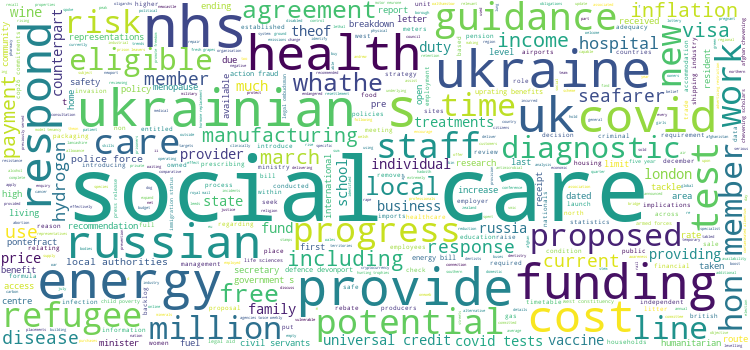

In [116]:
wordcloud.to_image()

In [ ]:
question_text

In [86]:
wpqs_sel[wpqs_sel.dateTabled == date].cleanedQuestion.tolist()

["what assessment he has made of the role of geothermal energy in delivering the uk's cop26 commitments.",
 'what comparative impact assessment he has made of the use of imported critical minerals and domestically-sourced minerals on delivering cop26 commitments.',
 "what recent assessment he has made of the role of carbon capture and storage in meeting the uk's climate change and cop26 commitments."]